In [15]:
#import neccessary packages
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np


#setup
url = 'https://en.wikipedia.org/wiki/List_of_U.S._metropolitan_areas_by_GDP'
wiki_page = requests.get(url).text #pull html data from url
soup = BeautifulSoup(wiki_page, 'html.parser') #parse html on page
table = soup.find('table', class_ = 'sortable') #pulls the first sortable table from page

#divide data to be added to dataframe
    
#separate out table headers to be used as DF headers    
header = table.findAll('th') #separate out just the headers
header = str(header) #create a string of the headers
th = re.compile(r'([^\s</th>,\[\]]\w*)') #match only the desired text
match_header=th.findall(header)
store_header = []
for match in match_header:
    store_header.append(match) #create a list of only the headers
#Clean up this table
store_header = store_header[3:10]

#separate out just data from rows
rows = table.findAll('td') #separate out just the rows
rows = str(rows) #create string for regex
td = re.compile(r'(\d+\,\d+\,?\d*)') #pull just population data
match_rows = td.findall(rows)
store_rows = []
for match in match_rows:
    store_rows.append(match)
rows_int = []
for i in store_rows: #string to int
    c = int(i.replace(',',''))
    rows_int.append(c) 
data = np.matrix(rows_int)
data = np.reshape(data, (10,7)) #create and reshape data

links = table.findAll('a') #pulls hyperlinks
cities = []
for link in links:
    cities.append(link.get('title'))  

#create dataframe
GDP_Area = pd.DataFrame(data, index = cities, columns = store_header)
GDP_Area

,2017,2016,2015,2014,2013,2012,2011
New York metropolitan area,1735100,1657457,1608345,1542759,1477046,1439234,1363844
Los Angeles metropolitan area,978200,1001677,963448,903100,852509,821769,782565
Chicago metropolitan area,670500,651222,635054,608723,585948,578016,547626
Dallas–Fort Worth metroplex,577500,511606,493048,477177,448179,417065,392006
Washington Metropolitan Area,531300,509224,493651,471272,459273,454229,444001
Greater Houston,526000,478618,496708,505758,488430,462300,430923
"San Francisco-Oakland-Fremont, CA MSA",481400,470529,440246,412423,385843,366459,340757
Delaware Valley,433900,431038,417698,400520,389787,370052,355924
Greater Boston,428200,422660,406002,381049,365048,355585,339857
Atlanta metropolitan area,371200,363768,344590,326556,307873,291483,280675


In [ ]:
GDP_Area.plot.barh(figsize = (10, 20), subplots = True) #shows bar chart of each city by year

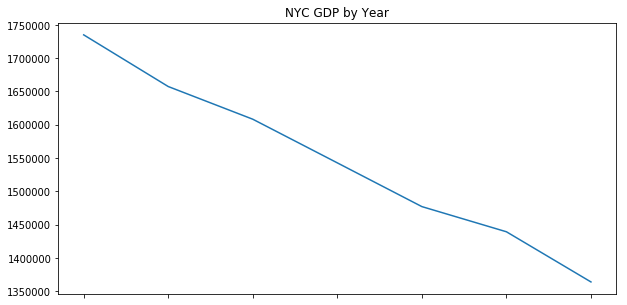

In [66]:
title = "NYC GDP by Year"
GDP_Area.iloc[0].plot(figsize = (10,5), title = "NYC GDP by Year")
                      